<a href="https://colab.research.google.com/github/vanshika72/LSTM-STOCK-PREDICTION/blob/main/Vanshika_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data successfully read from ACE.csv.
Null Values Before Cleaning:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Data cleaned: 0 rows removed.
Data normalized for 'Close' column.
Head of the DataFrame:
         Date       Open       High        Low     Close  Adj Close  Volume
0  2009-05-29  35.299999  36.700001  33.250000  0.015859  28.435696  512545
1  2009-06-01  34.500000  34.950001  31.799999  0.016922  29.889553  371948
2  2009-06-02  36.299999  36.700001  35.049999  0.018017  31.386160  393851
3  2009-06-03  38.549999  38.549999  37.000000  0.019143  32.925537  476412
4  2009-06-04  39.000000  39.900002  37.250000  0.019331  33.182102  391533

Description of the DataFrame:
              Open         High          Low        Close    Adj Close  \
count  3700.000000  3700.000000  3700.000000  3700.000000  3700.000000   
mean    143.992581   147.608486   140.583149     0.084974   141.668280   
std     239.005435

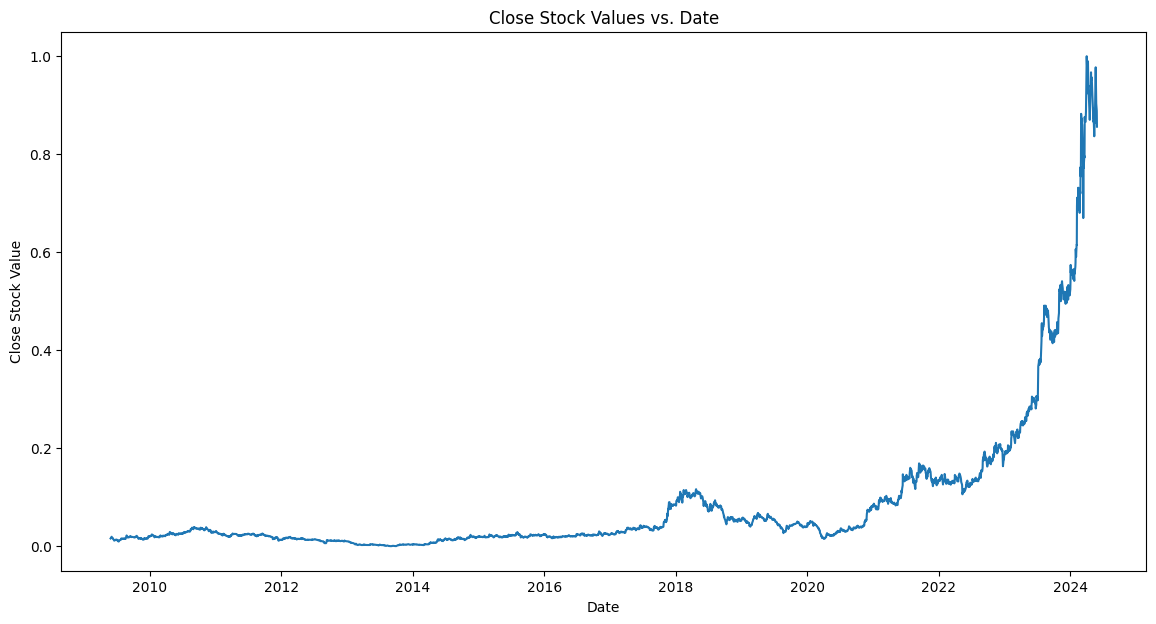

Epoch 1/50
2912/2912 - 86s - loss: 3.9740e-05 - val_loss: 3.9239e-04 - lr: 0.0010 - 86s/epoch - 29ms/step
Epoch 2/50
2912/2912 - 79s - loss: 2.1916e-05 - val_loss: 3.6932e-04 - lr: 0.0010 - 79s/epoch - 27ms/step
Epoch 3/50
2912/2912 - 78s - loss: 1.6468e-05 - val_loss: 0.0013 - lr: 0.0010 - 78s/epoch - 27ms/step
Epoch 4/50
2912/2912 - 81s - loss: 1.4476e-05 - val_loss: 0.0017 - lr: 0.0010 - 81s/epoch - 28ms/step
Epoch 5/50
2912/2912 - 77s - loss: 1.3772e-05 - val_loss: 8.0353e-04 - lr: 0.0010 - 77s/epoch - 26ms/step
Epoch 6/50
2912/2912 - 79s - loss: 1.2655e-05 - val_loss: 1.9519e-04 - lr: 0.0010 - 79s/epoch - 27ms/step
Epoch 7/50
2912/2912 - 80s - loss: 1.0648e-05 - val_loss: 1.9063e-04 - lr: 0.0010 - 80s/epoch - 27ms/step
Epoch 8/50
2912/2912 - 78s - loss: 1.1822e-05 - val_loss: 9.5047e-04 - lr: 0.0010 - 78s/epoch - 27ms/step
Epoch 9/50
2912/2912 - 76s - loss: 1.0962e-05 - val_loss: 2.0999e-04 - lr: 0.0010 - 76s/epoch - 26ms/step
Epoch 10/50
2912/2912 - 78s - loss: 1.0637e-05 - val_l

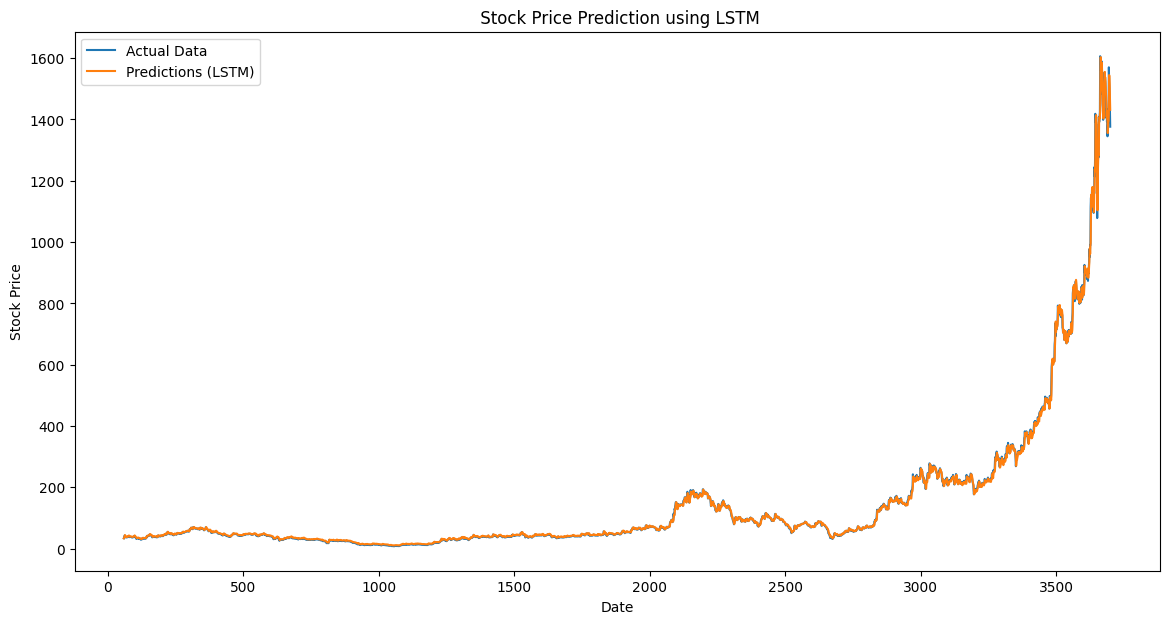

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


class Data:
    def __init__(self):
        self.dataframe = pd.DataFrame([])

    def read(self, file_name: str):
        """Reads a CSV file into the dataframe."""
        if os.path.exists(file_name):
            self.dataframe = pd.read_csv(file_name)
            print(f"Data successfully read from {file_name}.")
        else:
            print(f"Error: The file {file_name} does not exist.")

    def check_null_values(self):
        """Checks for null values in the dataframe."""
        print("Null Values Before Cleaning:")
        print(self.dataframe.isnull().sum())

    def clean_data(self):
        """Removes null values from the dataframe."""
        initial_shape = self.dataframe.shape
        self.dataframe.dropna(inplace=True)
        final_shape = self.dataframe.shape
        print(f"Data cleaned: {initial_shape[0] - final_shape[0]} rows removed.")

    def normalize(self):
        """Normalizes the 'Close' column in the dataframe."""
        scaler = MinMaxScaler(feature_range=(0, 1))
        self.dataframe['Close'] = scaler.fit_transform(self.dataframe['Close'].values.reshape(-1, 1))
        print("Data normalized for 'Close' column.")
        return scaler

    def visualize(self, y_label):
        """Plots graph for stock values vs. date."""
        if 'Date' in self.dataframe.columns and y_label in self.dataframe.columns:
            self.dataframe['Date'] = pd.to_datetime(self.dataframe['Date'])
            plt.figure(figsize=(14, 7))
            sns.lineplot(data=self.dataframe, x='Date', y=y_label)
            plt.title(f'{y_label} Stock Values vs. Date')
            plt.xlabel('Date')
            plt.ylabel(f'{y_label} Stock Value')
            plt.show()
        else:
            print(f"Dataframe does not contain 'Date' and '{y_label}' columns.")

    def print_head(self):
        """Prints the head of the dataframe."""
        print("Head of the DataFrame:")
        print(self.dataframe.head())

    def print_description(self):
        """Prints the description of the dataframe."""
        print("\nDescription of the DataFrame:")
        print(self.dataframe.describe())


def prepare_data(data, look_back):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)


# Instantiate the Data class and process the data
data_processor = Data()
csv_file_path = 'ACE.csv'  # Replace with the path to your CSV file
data_processor.read(csv_file_path)
data_processor.check_null_values()
data_processor.clean_data()
scaler = data_processor.normalize()
data_processor.print_head()
data_processor.print_description()
data_processor.visualize('Close')

# Use the closing price for modeling
data = data_processor.dataframe['Close'].values.reshape(-1, 1)

# Prepare data for LSTM
look_back = 60
X, y = prepare_data(data, look_back)

# Reshape input to be [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and validation sets
split = int(0.8 * len(X))
X_train, X_val = X[:split], X[split:]
y_train, y_val = y[:split], y[split:]

# Build LSTM model
model_lstm = Sequential([
    LSTM(50, input_shape=(look_back, 1), return_sequences=True),
    Dropout(0.05),
    LSTM(50, return_sequences=False),
    Dropout(0.05),
    Dense(1)
])

model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Callbacks for early stopping and reducing learning rate
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

# Train the LSTM model
history = model_lstm.fit(X_train, y_train, epochs=50, batch_size=1,
                         validation_data=(X_val, y_val), callbacks=[early_stopping, reduce_lr], verbose=2)

# Make predictions using LSTM model
train_predictions_lstm = model_lstm.predict(X)
train_predictions_lstm = scaler.inverse_transform(train_predictions_lstm)
y = scaler.inverse_transform(y.reshape(-1, 1))





# Plot the results for LSTM
plt.figure(figsize=(14, 7))
plt.plot(data_processor.dataframe.index[look_back:], y, label='Actual Data')
plt.plot(data_processor.dataframe.index[look_back:], train_predictions_lstm, label='Predictions (LSTM)')
plt.title(' Stock Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()



Data successfully read from ABBOTINDIA.csv.
Null Values Before Cleaning:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Data cleaned: 0 rows removed.
Data normalized for 'Close' column.
Head of the DataFrame:
         Date        Open        High         Low  Close   Adj Close  Volume
0  2009-05-29  280.100006  280.100006  280.100006    0.0  248.228531       0
1  2009-06-01  280.100006  280.100006  280.100006    0.0  248.228531       0
2  2009-06-02  280.100006  280.100006  280.100006    0.0  248.228531       0
3  2009-06-03  280.100006  280.100006  280.100006    0.0  248.228531       0
4  2009-06-04  280.100006  280.100006  280.100006    0.0  248.228531       0

Description of the DataFrame:
               Open          High           Low        Close     Adj Close  \
count   3700.000000   3700.000000   3700.000000  3700.000000   3700.000000   
mean    8157.096375   8253.920312   8051.008157     0.268900   7970.595

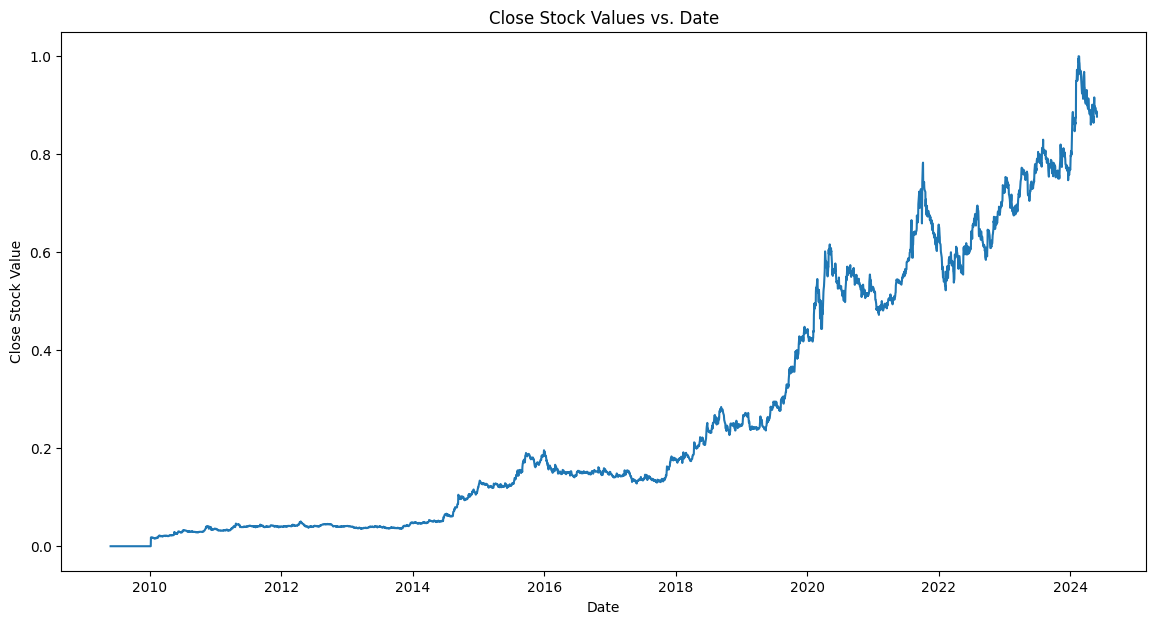

Epoch 1/50
2912/2912 - 83s - loss: 6.9271e-04 - val_loss: 0.0018 - lr: 0.0010 - 83s/epoch - 28ms/step
Epoch 2/50
2912/2912 - 77s - loss: 3.0663e-04 - val_loss: 3.1863e-04 - lr: 0.0010 - 77s/epoch - 26ms/step
Epoch 3/50
2912/2912 - 75s - loss: 2.6234e-04 - val_loss: 6.7993e-04 - lr: 0.0010 - 75s/epoch - 26ms/step
Epoch 4/50
2912/2912 - 77s - loss: 2.4313e-04 - val_loss: 3.8288e-04 - lr: 0.0010 - 77s/epoch - 27ms/step
Epoch 5/50
2912/2912 - 78s - loss: 1.7350e-04 - val_loss: 2.3036e-04 - lr: 0.0010 - 78s/epoch - 27ms/step
Epoch 6/50
2912/2912 - 75s - loss: 1.9937e-04 - val_loss: 2.6985e-04 - lr: 0.0010 - 75s/epoch - 26ms/step
Epoch 7/50
2912/2912 - 77s - loss: 1.9779e-04 - val_loss: 0.0021 - lr: 0.0010 - 77s/epoch - 26ms/step
Epoch 8/50
2912/2912 - 79s - loss: 1.3040e-04 - val_loss: 7.7076e-04 - lr: 5.0000e-04 - 79s/epoch - 27ms/step
Epoch 9/50
2912/2912 - 75s - loss: 1.0978e-04 - val_loss: 1.9985e-04 - lr: 5.0000e-04 - 75s/epoch - 26ms/step
Epoch 10/50
2912/2912 - 78s - loss: 1.0327e-04

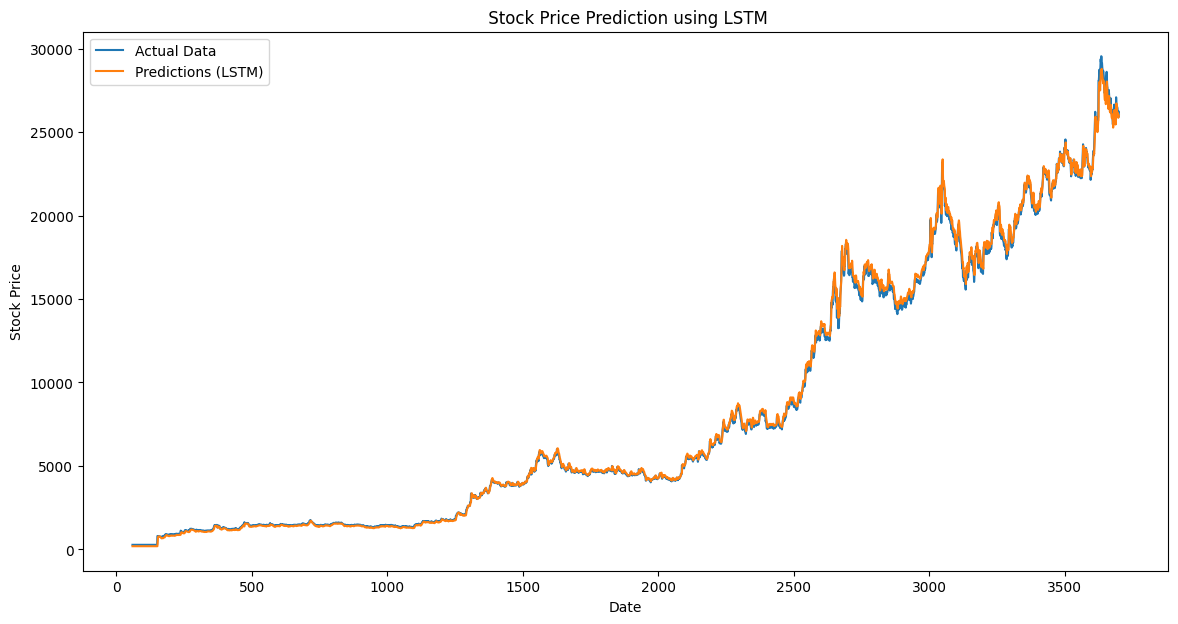

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


class Data:
    def __init__(self):
        self.dataframe = pd.DataFrame([])

    def read(self, file_name: str):
        """Reads a CSV file into the dataframe."""
        if os.path.exists(file_name):
            self.dataframe = pd.read_csv(file_name)
            print(f"Data successfully read from {file_name}.")
        else:
            print(f"Error: The file {file_name} does not exist.")

    def check_null_values(self):
        """Checks for null values in the dataframe."""
        print("Null Values Before Cleaning:")
        print(self.dataframe.isnull().sum())

    def clean_data(self):
        """Removes null values from the dataframe."""
        initial_shape = self.dataframe.shape
        self.dataframe.dropna(inplace=True)
        final_shape = self.dataframe.shape
        print(f"Data cleaned: {initial_shape[0] - final_shape[0]} rows removed.")

    def normalize(self):
        """Normalizes the 'Close' column in the dataframe."""
        scaler = MinMaxScaler(feature_range=(0, 1))
        self.dataframe['Close'] = scaler.fit_transform(self.dataframe['Close'].values.reshape(-1, 1))
        print("Data normalized for 'Close' column.")
        return scaler

    def visualize(self, y_label):
        """Plots graph for stock values vs. date."""
        if 'Date' in self.dataframe.columns and y_label in self.dataframe.columns:
            self.dataframe['Date'] = pd.to_datetime(self.dataframe['Date'])
            plt.figure(figsize=(14, 7))
            sns.lineplot(data=self.dataframe, x='Date', y=y_label)
            plt.title(f'{y_label} Stock Values vs. Date')
            plt.xlabel('Date')
            plt.ylabel(f'{y_label} Stock Value')
            plt.show()
        else:
            print(f"Dataframe does not contain 'Date' and '{y_label}' columns.")

    def print_head(self):
        """Prints the head of the dataframe."""
        print("Head of the DataFrame:")
        print(self.dataframe.head())

    def print_description(self):
        """Prints the description of the dataframe."""
        print("\nDescription of the DataFrame:")
        print(self.dataframe.describe())


def prepare_data(data, look_back):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)


# Instantiate the Data class and process the data
data_processor = Data()
csv_file_path = 'ABBOTINDIA.csv'  # Replace with the path to your CSV file
data_processor.read(csv_file_path)
data_processor.check_null_values()
data_processor.clean_data()
scaler = data_processor.normalize()
data_processor.print_head()
data_processor.print_description()
data_processor.visualize('Close')

# Use the closing price for modeling
data = data_processor.dataframe['Close'].values.reshape(-1, 1)

# Prepare data for LSTM
look_back = 60
X, y = prepare_data(data, look_back)

# Reshape input to be [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and validation sets
split = int(0.8 * len(X))
X_train, X_val = X[:split], X[split:]
y_train, y_val = y[:split], y[split:]

# Build LSTM model
model_lstm = Sequential([
    LSTM(50, input_shape=(look_back, 1), return_sequences=True),
    Dropout(0.05),
    LSTM(50, return_sequences=False),
    Dropout(0.05),
    Dense(1)
])

model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Callbacks for early stopping and reducing learning rate
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

# Train the LSTM model
history = model_lstm.fit(X_train, y_train, epochs=50, batch_size=1,
                         validation_data=(X_val, y_val), callbacks=[early_stopping, reduce_lr], verbose=2)

# Make predictions using LSTM model
train_predictions_lstm = model_lstm.predict(X)
train_predictions_lstm = scaler.inverse_transform(train_predictions_lstm)
y = scaler.inverse_transform(y.reshape(-1, 1))





# Plot the results for LSTM
plt.figure(figsize=(14, 7))
plt.plot(data_processor.dataframe.index[look_back:], y, label='Actual Data')
plt.plot(data_processor.dataframe.index[look_back:], train_predictions_lstm, label='Predictions (LSTM)')
plt.title(' Stock Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()



Data successfully read from TATAMOTORS.NS.csv.
Null Values Before Cleaning:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Data cleaned: 0 rows removed.
Data normalized for 'Close' column.
Head of the DataFrame:
         Date        Open        High         Low     Close   Adj Close  \
0  2019-05-29  179.850006  180.000000  175.350006  0.113160  175.802078   
1  2019-05-30  177.500000  178.500000  173.100006  0.111938  174.605804   
2  2019-05-31  177.800003  177.850006  170.000000  0.109339  172.063736   
3  2019-06-03  170.500000  175.000000  168.399994  0.111275  173.957825   
4  2019-06-04  174.250000  177.199997  172.399994  0.110002  172.711716   

     Volume  
0  15222008  
1  18078726  
2  21488115  
3  21288078  
4  17428731  

Description of the DataFrame:
              Open         High          Low        Close    Adj Close  \
count  1235.000000  1235.000000  1235.000000  1235.000000  1235.000000   
mea

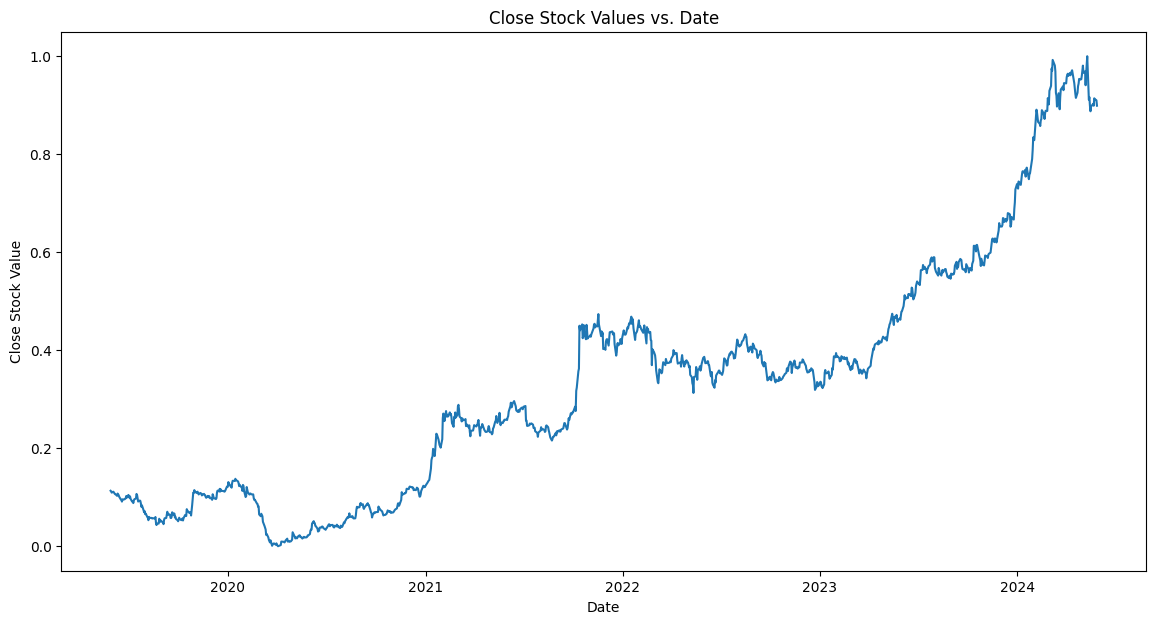

Epoch 1/50
940/940 - 35s - loss: 0.0012 - val_loss: 0.0038 - lr: 0.0010 - 35s/epoch - 37ms/step
Epoch 2/50
940/940 - 29s - loss: 5.9778e-04 - val_loss: 9.0330e-04 - lr: 0.0010 - 29s/epoch - 31ms/step
Epoch 3/50
940/940 - 30s - loss: 5.3080e-04 - val_loss: 0.0018 - lr: 0.0010 - 30s/epoch - 31ms/step
Epoch 4/50
940/940 - 31s - loss: 4.4749e-04 - val_loss: 0.0036 - lr: 0.0010 - 31s/epoch - 33ms/step
Epoch 5/50
940/940 - 30s - loss: 3.9319e-04 - val_loss: 0.0026 - lr: 0.0010 - 30s/epoch - 31ms/step
Epoch 6/50
940/940 - 30s - loss: 3.2859e-04 - val_loss: 0.0037 - lr: 0.0010 - 30s/epoch - 32ms/step
Epoch 7/50
940/940 - 29s - loss: 3.2070e-04 - val_loss: 0.0022 - lr: 0.0010 - 29s/epoch - 31ms/step
Epoch 8/50
940/940 - 29s - loss: 2.3267e-04 - val_loss: 6.6641e-04 - lr: 5.0000e-04 - 29s/epoch - 31ms/step
Epoch 9/50
940/940 - 29s - loss: 2.4795e-04 - val_loss: 0.0025 - lr: 5.0000e-04 - 29s/epoch - 31ms/step
Epoch 10/50
940/940 - 29s - loss: 2.1411e-04 - val_loss: 0.0020 - lr: 5.0000e-04 - 29s/e

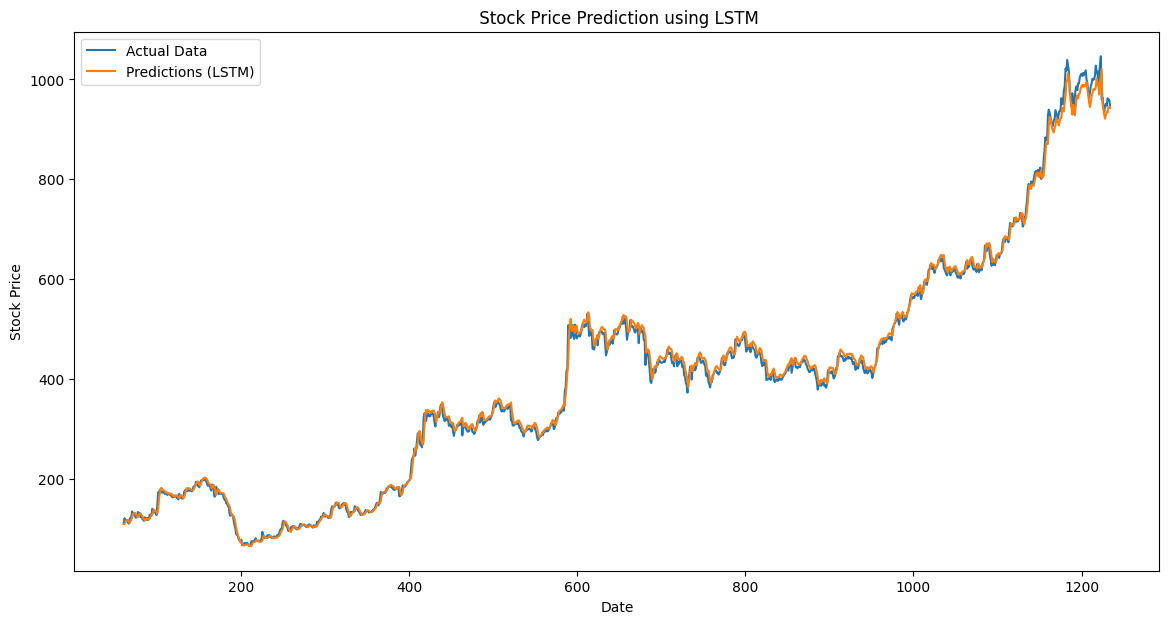

Root Mean Squared Error (RMSE): 12.2549


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


class Data:
    def __init__(self):
        self.dataframe = pd.DataFrame([])

    def read(self, file_name: str):
        """Reads a CSV file into the dataframe."""
        if os.path.exists(file_name):
            self.dataframe = pd.read_csv(file_name)
            print(f"Data successfully read from {file_name}.")
        else:
            print(f"Error: The file {file_name} does not exist.")

    def check_null_values(self):
        """Checks for null values in the dataframe."""
        print("Null Values Before Cleaning:")
        print(self.dataframe.isnull().sum())

    def clean_data(self):
        """Removes null values from the dataframe."""
        initial_shape = self.dataframe.shape
        self.dataframe.dropna(inplace=True)
        final_shape = self.dataframe.shape
        print(f"Data cleaned: {initial_shape[0] - final_shape[0]} rows removed.")

    def normalize(self):
        """Normalizes the 'Close' column in the dataframe."""
        scaler = MinMaxScaler(feature_range=(0, 1))
        self.dataframe['Close'] = scaler.fit_transform(self.dataframe['Close'].values.reshape(-1, 1))
        print("Data normalized for 'Close' column.")
        return scaler

    def visualize(self, y_label):
        """Plots graph for stock values vs. date."""
        if 'Date' in self.dataframe.columns and y_label in self.dataframe.columns:
            self.dataframe['Date'] = pd.to_datetime(self.dataframe['Date'])
            plt.figure(figsize=(14, 7))
            sns.lineplot(data=self.dataframe, x='Date', y=y_label)
            plt.title(f'{y_label} Stock Values vs. Date')
            plt.xlabel('Date')
            plt.ylabel(f'{y_label} Stock Value')
            plt.show()
        else:
            print(f"Dataframe does not contain 'Date' and '{y_label}' columns.")

    def print_head(self):
        """Prints the head of the dataframe."""
        print("Head of the DataFrame:")
        print(self.dataframe.head())

    def print_description(self):
        """Prints the description of the dataframe."""
        print("\nDescription of the DataFrame:")
        print(self.dataframe.describe())


def prepare_data(data, look_back):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)


# Instantiate the Data class and process the data
data_processor = Data()
csv_file_path = 'TATAMOTORS.NS.csv'  # Replace with the path to your CSV file
data_processor.read(csv_file_path)
data_processor.check_null_values()
data_processor.clean_data()
scaler = data_processor.normalize()
data_processor.print_head()
data_processor.print_description()
data_processor.visualize('Close')

# Use the closing price for modeling
data = data_processor.dataframe['Close'].values.reshape(-1, 1)

# Prepare data for LSTM
look_back = 60
X, y = prepare_data(data, look_back)

# Reshape input to be [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and validation sets
split = int(0.8 * len(X))
X_train, X_val = X[:split], X[split:]
y_train, y_val = y[:split], y[split:]

# Build LSTM model
model_lstm = Sequential([
    LSTM(50, input_shape=(look_back, 1), return_sequences=True),
    Dropout(0.05),
    LSTM(50, return_sequences=False),
    Dropout(0.05),
    Dense(1)
])

model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Callbacks for early stopping and reducing learning rate
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

# Train the LSTM model
history = model_lstm.fit(X_train, y_train, epochs=50, batch_size=1,
                         validation_data=(X_val, y_val), callbacks=[early_stopping, reduce_lr], verbose=2)

# Make predictions using LSTM model
train_predictions_lstm = model_lstm.predict(X)
train_predictions_lstm = scaler.inverse_transform(train_predictions_lstm)
y = scaler.inverse_transform(y.reshape(-1, 1))





# Plot the results for LSTM
plt.figure(figsize=(14, 7))
plt.plot(data_processor.dataframe.index[look_back:], y, label='Actual Data')
plt.plot(data_processor.dataframe.index[look_back:], train_predictions_lstm, label='Predictions (LSTM)')
plt.title(' Stock Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()



Data successfully read from RELIANCE.NS.csv.
Null Values Before Cleaning:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Data cleaned: 0 rows removed.
Data normalized for 'Close' column.
Head of the DataFrame:
         Date         Open         High          Low     Close    Adj Close  \
0  2019-05-31  1223.285767  1226.943115  1207.102051  0.184857  1191.748413   
1  2019-06-03  1220.634155  1250.121460  1208.016357  0.197309  1218.671631   
2  2019-06-04  1241.160889  1256.521729  1232.611938  0.193766  1211.011230   
3  2019-06-06  1245.229736  1245.229736  1207.924927  0.183697  1189.239746   
4  2019-06-07  1212.359497  1213.548096  1193.752808  0.178538  1178.085083   

     Volume  
0  12862033  
1   9278471  
2   7721380  
3   8382417  
4   7361209  

Description of the DataFrame:
              Open         High          Low        Close    Adj Close  \
count  1236.000000  1236.000000  1236.000000  1236.0000

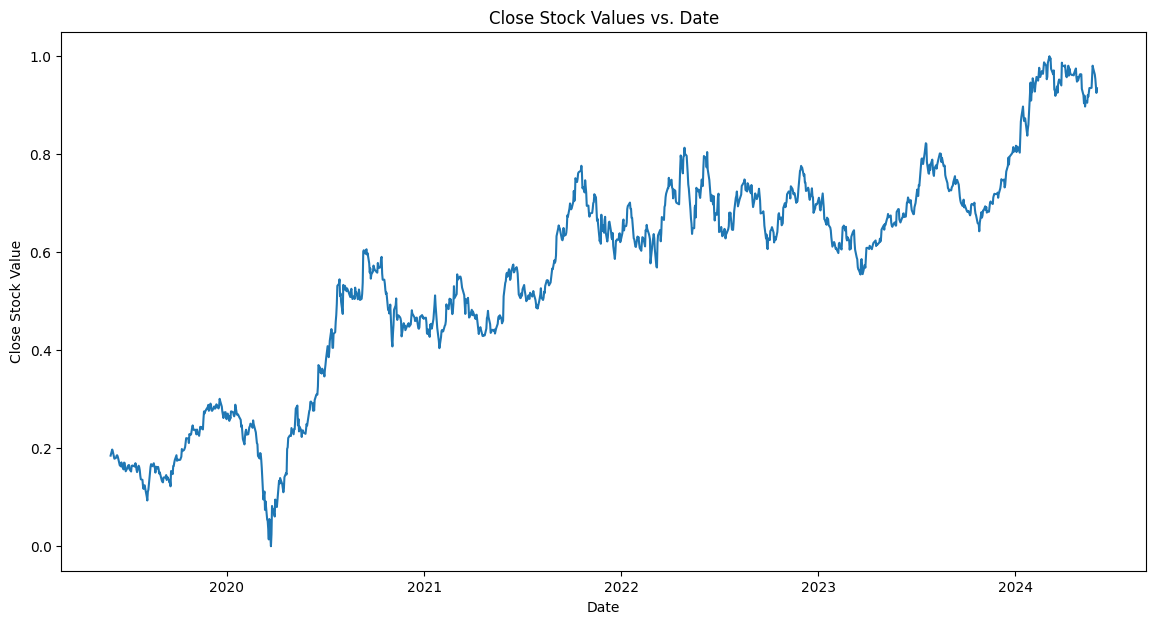

Epoch 1/50
940/940 - 40s - loss: 0.0047 - val_loss: 0.0012 - lr: 0.0010 - 40s/epoch - 43ms/step
Epoch 2/50
940/940 - 26s - loss: 0.0020 - val_loss: 0.0017 - lr: 0.0010 - 26s/epoch - 28ms/step
Epoch 3/50
940/940 - 29s - loss: 0.0016 - val_loss: 5.3628e-04 - lr: 0.0010 - 29s/epoch - 31ms/step
Epoch 4/50
940/940 - 27s - loss: 0.0014 - val_loss: 4.6167e-04 - lr: 0.0010 - 27s/epoch - 28ms/step
Epoch 5/50
940/940 - 26s - loss: 0.0012 - val_loss: 3.7045e-04 - lr: 0.0010 - 26s/epoch - 28ms/step
Epoch 6/50
940/940 - 27s - loss: 0.0012 - val_loss: 6.1576e-04 - lr: 0.0010 - 27s/epoch - 28ms/step
Epoch 7/50
940/940 - 29s - loss: 9.8491e-04 - val_loss: 0.0012 - lr: 0.0010 - 29s/epoch - 31ms/step
Epoch 8/50
940/940 - 28s - loss: 9.5562e-04 - val_loss: 0.0014 - lr: 0.0010 - 28s/epoch - 30ms/step
Epoch 9/50
940/940 - 29s - loss: 8.1175e-04 - val_loss: 0.0014 - lr: 0.0010 - 29s/epoch - 31ms/step
Epoch 10/50
940/940 - 30s - loss: 7.2600e-04 - val_loss: 3.0025e-04 - lr: 0.0010 - 30s/epoch - 32ms/step
Epo

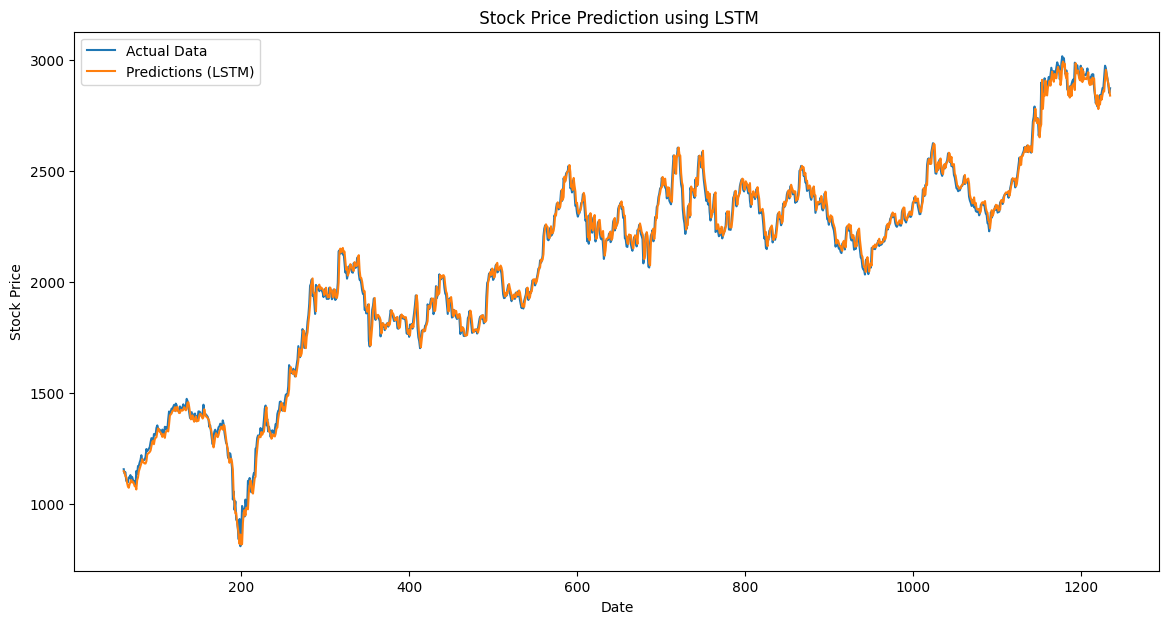

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


class Data:
    def __init__(self):
        self.dataframe = pd.DataFrame([])

    def read(self, file_name: str):
        """Reads a CSV file into the dataframe."""
        if os.path.exists(file_name):
            self.dataframe = pd.read_csv(file_name)
            print(f"Data successfully read from {file_name}.")
        else:
            print(f"Error: The file {file_name} does not exist.")

    def check_null_values(self):
        """Checks for null values in the dataframe."""
        print("Null Values Before Cleaning:")
        print(self.dataframe.isnull().sum())

    def clean_data(self):
        """Removes null values from the dataframe."""
        initial_shape = self.dataframe.shape
        self.dataframe.dropna(inplace=True)
        final_shape = self.dataframe.shape
        print(f"Data cleaned: {initial_shape[0] - final_shape[0]} rows removed.")

    def normalize(self):
        """Normalizes the 'Close' column in the dataframe."""
        scaler = MinMaxScaler(feature_range=(0, 1))
        self.dataframe['Close'] = scaler.fit_transform(self.dataframe['Close'].values.reshape(-1, 1))
        print("Data normalized for 'Close' column.")
        return scaler

    def visualize(self, y_label):
        """Plots graph for stock values vs. date."""
        if 'Date' in self.dataframe.columns and y_label in self.dataframe.columns:
            self.dataframe['Date'] = pd.to_datetime(self.dataframe['Date'])
            plt.figure(figsize=(14, 7))
            sns.lineplot(data=self.dataframe, x='Date', y=y_label)
            plt.title(f'{y_label} Stock Values vs. Date')
            plt.xlabel('Date')
            plt.ylabel(f'{y_label} Stock Value')
            plt.show()
        else:
            print(f"Dataframe does not contain 'Date' and '{y_label}' columns.")

    def print_head(self):
        """Prints the head of the dataframe."""
        print("Head of the DataFrame:")
        print(self.dataframe.head())

    def print_description(self):
        """Prints the description of the dataframe."""
        print("\nDescription of the DataFrame:")
        print(self.dataframe.describe())


def prepare_data(data, look_back):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)


# Instantiate the Data class and process the data
data_processor = Data()
csv_file_path = 'RELIANCE.NS.csv'  # Replace with the path to your CSV file
data_processor.read(csv_file_path)
data_processor.check_null_values()
data_processor.clean_data()
scaler = data_processor.normalize()
data_processor.print_head()
data_processor.print_description()
data_processor.visualize('Close')

# Use the closing price for modeling
data = data_processor.dataframe['Close'].values.reshape(-1, 1)

# Prepare data for LSTM
look_back = 60
X, y = prepare_data(data, look_back)

# Reshape input to be [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and validation sets
split = int(0.8 * len(X))
X_train, X_val = X[:split], X[split:]
y_train, y_val = y[:split], y[split:]

# Build LSTM model
model_lstm = Sequential([
    LSTM(50, input_shape=(look_back, 1), return_sequences=True),
    Dropout(0.05),
    LSTM(50, return_sequences=False),
    Dropout(0.05),
    Dense(1)
])

model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Callbacks for early stopping and reducing learning rate
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

# Train the LSTM model
history = model_lstm.fit(X_train, y_train, epochs=50, batch_size=1,
                         validation_data=(X_val, y_val), callbacks=[early_stopping, reduce_lr], verbose=2)

# Make predictions using LSTM model
train_predictions_lstm = model_lstm.predict(X)
train_predictions_lstm = scaler.inverse_transform(train_predictions_lstm)
y = scaler.inverse_transform(y.reshape(-1, 1))





# Plot the results for LSTM
plt.figure(figsize=(14, 7))
plt.plot(data_processor.dataframe.index[look_back:], y, label='Actual Data')
plt.plot(data_processor.dataframe.index[look_back:], train_predictions_lstm, label='Predictions (LSTM)')
plt.title(' Stock Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()



Data successfully read from MSFT.csv.
Null Values Before Cleaning:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Data cleaned: 0 rows removed.
Data normalized for 'Close' column.
Head of the DataFrame:
         Date        Open        High         Low     Close   Adj Close  \
0  2023-05-30  335.230011  335.739990  330.519989  0.161091  328.639160   
1  2023-05-31  332.290009  335.940002  327.329987  0.137270  325.841064   
2  2023-06-01  325.929993  333.529999  324.720001  0.172664  329.998505   
3  2023-06-02  334.250000  337.500000  332.549988  0.196486  332.796631   
4  2023-06-05  335.220001  338.559998  334.660004  0.201047  333.332489   

     Volume  
0  29503100  
1  45950600  
2  26773900  
3  25864000  
4  21307100  

Description of the DataFrame:
             Open        High         Low       Close   Adj Close  \
count  252.000000  252.000000  252.000000  252.000000  252.000000   
mean   369.334285  372

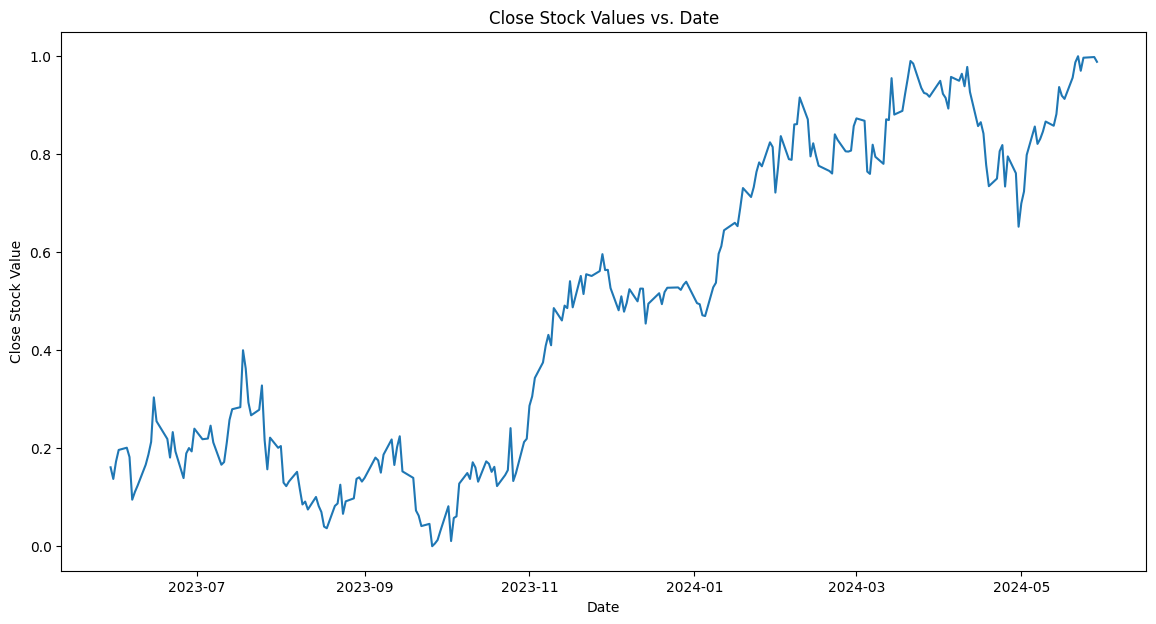

Epoch 1/50
153/153 - 10s - loss: 0.0227 - val_loss: 0.0092 - lr: 0.0010 - 10s/epoch - 64ms/step
Epoch 2/50
153/153 - 5s - loss: 0.0077 - val_loss: 0.0116 - lr: 0.0010 - 5s/epoch - 30ms/step
Epoch 3/50
153/153 - 6s - loss: 0.0073 - val_loss: 0.0114 - lr: 0.0010 - 6s/epoch - 38ms/step
Epoch 4/50
153/153 - 4s - loss: 0.0066 - val_loss: 0.0079 - lr: 0.0010 - 4s/epoch - 28ms/step
Epoch 5/50
153/153 - 5s - loss: 0.0059 - val_loss: 0.0175 - lr: 0.0010 - 5s/epoch - 34ms/step
Epoch 6/50
153/153 - 4s - loss: 0.0053 - val_loss: 0.0046 - lr: 0.0010 - 4s/epoch - 27ms/step
Epoch 7/50
153/153 - 4s - loss: 0.0051 - val_loss: 0.0038 - lr: 0.0010 - 4s/epoch - 27ms/step
Epoch 8/50
153/153 - 5s - loss: 0.0043 - val_loss: 0.0046 - lr: 0.0010 - 5s/epoch - 35ms/step
Epoch 9/50
153/153 - 4s - loss: 0.0043 - val_loss: 0.0051 - lr: 0.0010 - 4s/epoch - 27ms/step
Epoch 10/50
153/153 - 4s - loss: 0.0042 - val_loss: 0.0036 - lr: 0.0010 - 4s/epoch - 27ms/step
Epoch 11/50
153/153 - 5s - loss: 0.0036 - val_loss: 0.006

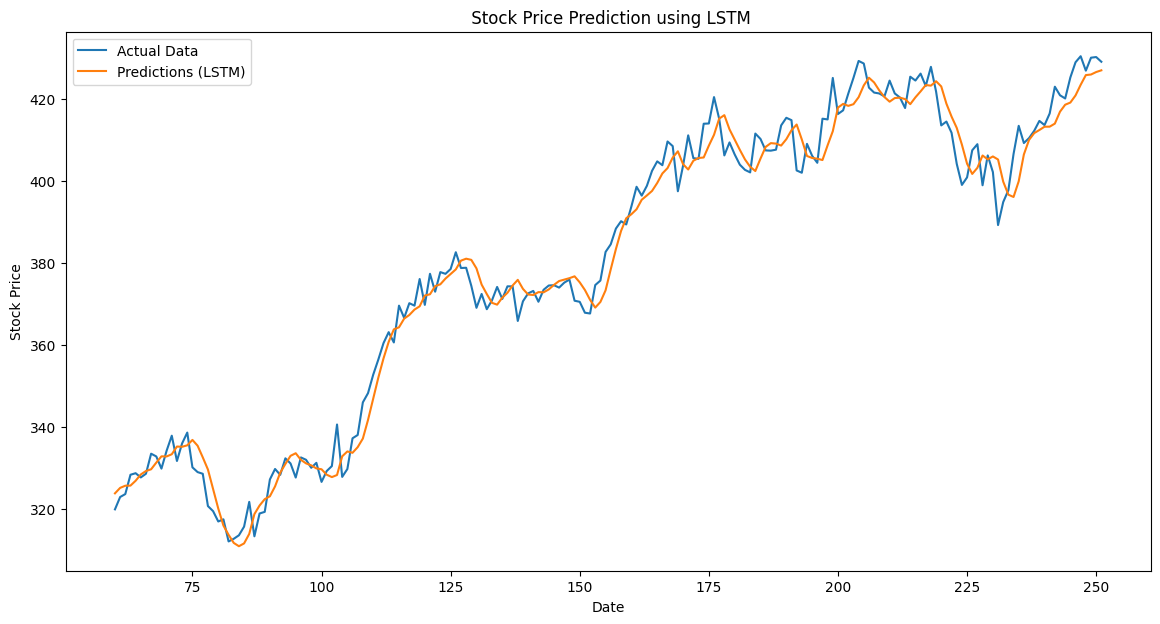

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


class Data:
    def __init__(self):
        self.dataframe = pd.DataFrame([])

    def read(self, file_name: str):
        """Reads a CSV file into the dataframe."""
        if os.path.exists(file_name):
            self.dataframe = pd.read_csv(file_name)
            print(f"Data successfully read from {file_name}.")
        else:
            print(f"Error: The file {file_name} does not exist.")

    def check_null_values(self):
        """Checks for null values in the dataframe."""
        print("Null Values Before Cleaning:")
        print(self.dataframe.isnull().sum())

    def clean_data(self):
        """Removes null values from the dataframe."""
        initial_shape = self.dataframe.shape
        self.dataframe.dropna(inplace=True)
        final_shape = self.dataframe.shape
        print(f"Data cleaned: {initial_shape[0] - final_shape[0]} rows removed.")

    def normalize(self):
        """Normalizes the 'Close' column in the dataframe."""
        scaler = MinMaxScaler(feature_range=(0, 1))
        self.dataframe['Close'] = scaler.fit_transform(self.dataframe['Close'].values.reshape(-1, 1))
        print("Data normalized for 'Close' column.")
        return scaler

    def visualize(self, y_label):
        """Plots graph for stock values vs. date."""
        if 'Date' in self.dataframe.columns and y_label in self.dataframe.columns:
            self.dataframe['Date'] = pd.to_datetime(self.dataframe['Date'])
            plt.figure(figsize=(14, 7))
            sns.lineplot(data=self.dataframe, x='Date', y=y_label)
            plt.title(f'{y_label} Stock Values vs. Date')
            plt.xlabel('Date')
            plt.ylabel(f'{y_label} Stock Value')
            plt.show()
        else:
            print(f"Dataframe does not contain 'Date' and '{y_label}' columns.")

    def print_head(self):
        """Prints the head of the dataframe."""
        print("Head of the DataFrame:")
        print(self.dataframe.head())

    def print_description(self):
        """Prints the description of the dataframe."""
        print("\nDescription of the DataFrame:")
        print(self.dataframe.describe())


def prepare_data(data, look_back):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)


# Instantiate the Data class and process the data
data_processor = Data()
csv_file_path = 'MSFT.csv'  # Replace with the path to your CSV file
data_processor.read(csv_file_path)
data_processor.check_null_values()
data_processor.clean_data()
scaler = data_processor.normalize()
data_processor.print_head()
data_processor.print_description()
data_processor.visualize('Close')

# Use the closing price for modeling
data = data_processor.dataframe['Close'].values.reshape(-1, 1)

# Prepare data for LSTM
look_back = 60
X, y = prepare_data(data, look_back)

# Reshape input to be [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the data into training and validation sets
split = int(0.8 * len(X))
X_train, X_val = X[:split], X[split:]
y_train, y_val = y[:split], y[split:]

# Build LSTM model
model_lstm = Sequential([
    LSTM(50, input_shape=(look_back, 1), return_sequences=True),
    Dropout(0.05),
    LSTM(50, return_sequences=False),
    Dropout(0.05),
    Dense(1)
])

model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Callbacks for early stopping and reducing learning rate
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

# Train the LSTM model
history = model_lstm.fit(X_train, y_train, epochs=50, batch_size=1,
                         validation_data=(X_val, y_val), callbacks=[early_stopping, reduce_lr], verbose=2)

# Make predictions using LSTM model
train_predictions_lstm = model_lstm.predict(X)
train_predictions_lstm = scaler.inverse_transform(train_predictions_lstm)
y = scaler.inverse_transform(y.reshape(-1, 1))





# Plot the results for LSTM
plt.figure(figsize=(14, 7))
plt.plot(data_processor.dataframe.index[look_back:], y, label='Actual Data')
plt.plot(data_processor.dataframe.index[look_back:], train_predictions_lstm, label='Predictions (LSTM)')
plt.title(' Stock Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

